<a href="https://colab.research.google.com/github/SageSquash/Major-Project/blob/main/Code/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model

In [ ]:
import tensorflow as tf
from sklearn.utils import resample
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/data/mitbih_train.csv',header=None)
test=pd.read_csv('/content/drive/MyDrive/data/mitbih_test.csv',header=None)

In [ ]:
train[187]=train[187].astype(int)
datacount=train[187].value_counts()

In [ ]:
datacount

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

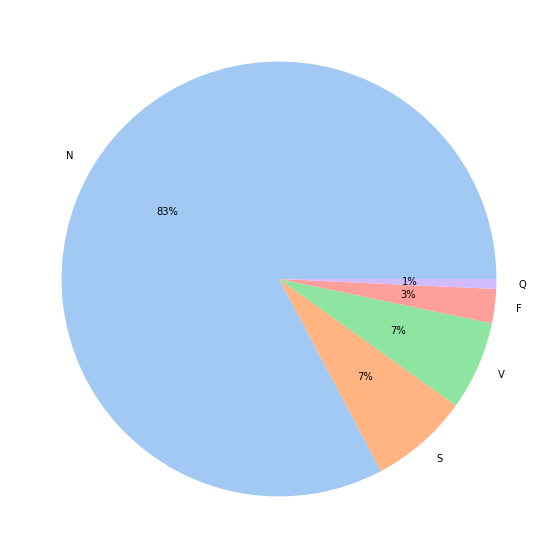

In [ ]:
# Number of Samples: 109446
# Number of Categories: 5
# Sampling Frequency: 125Hz
# Data Source: Physionet's MIT-BIH Arrhythmia Dataset
# Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
data = datacount
labels = ['N', 'S', 'V', 'F', 'Q']
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10,10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
df_1=train[train[187]==1]
df_2=train[train[187]==2]
df_3=train[train[187]==3]
df_4=train[train[187]==4]
df_0=(train[train[187]==0]).sample(n=20000,random_state=42)

df_1=resample(df_1,replace=True,n_samples=20000)
df_2=resample(df_2,replace=True,n_samples=20000)
df_3=resample(df_3,replace=True,n_samples=20000)
df_4=resample(df_4,replace=True,n_samples=20000)

train=pd.concat([df_0,df_1,df_2,df_3,df_4])

In [ ]:
datacount = train[187].value_counts()

In [ ]:
datacount

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64

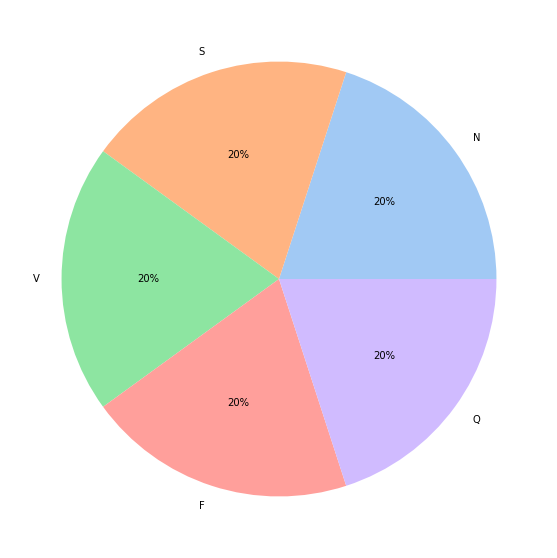

In [ ]:
data = datacount
labels = ['N', 'S', 'V', 'F', 'Q']
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10,10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
sam=train.groupby(187,group_keys=False).apply(lambda train : train.sample(1))

In [ ]:
sam

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
68960,1.000000,0.797531,0.303704,0.039506,0.049383,0.059259,0.017284,0.019753,0.022222,0.022222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73945,0.933180,0.910138,0.341014,0.000000,0.221198,0.230415,0.228111,0.214286,0.218894,0.230415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
77221,0.947248,0.990826,0.926606,0.839450,0.800459,0.766055,0.818807,0.649083,0.362385,0.185780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80788,1.000000,0.838331,0.595828,0.256845,0.063885,0.089961,0.082138,0.056063,0.054759,0.045632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86206,0.934307,0.503650,0.551095,0.540146,0.558394,0.518248,0.510949,0.416058,0.310219,0.164234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


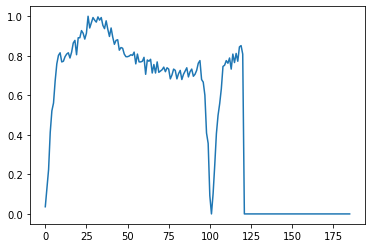

In [ ]:
plt.plot(sam.iloc[0,:186])

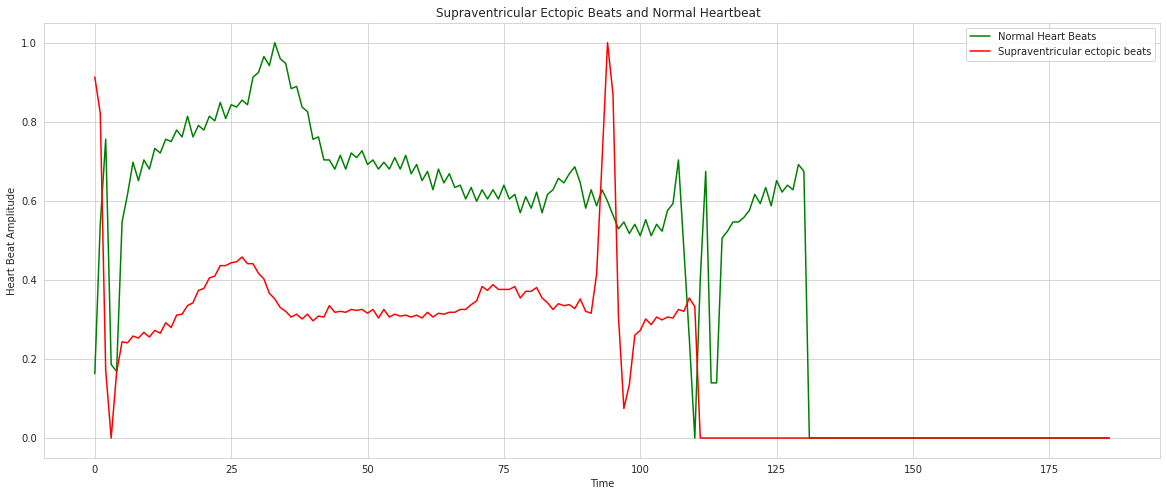

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train.iloc[0, 0:187], color = 'green', label = 'Normal Heart Beats')
plt.plot(df_1.iloc[0, 0:187], color = 'red', label = 'Supraventricular ectopic beats')
plt.title("Supraventricular Ectopic Beats and Normal Heartbeat  ")
plt.xlabel("Time")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

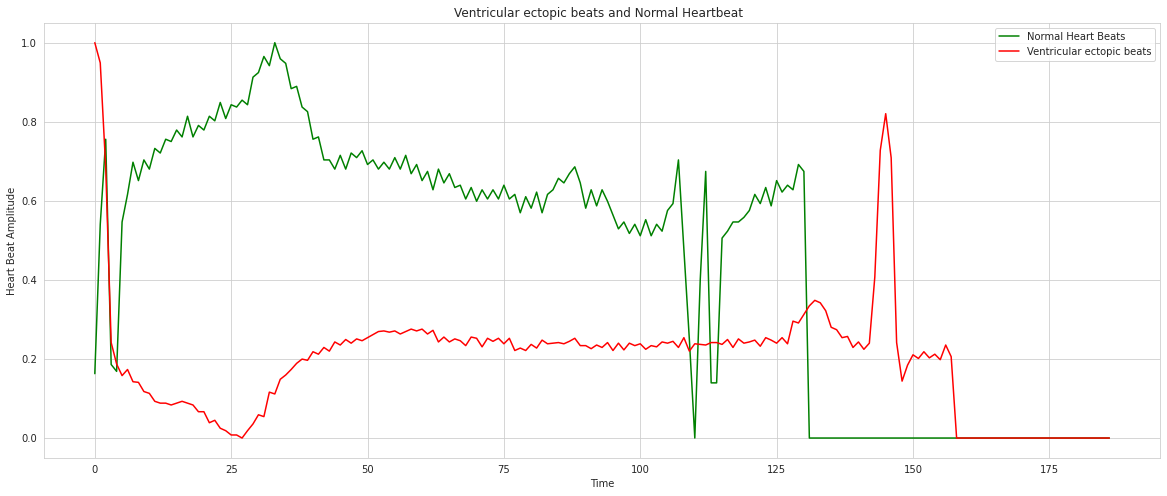

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train.iloc[0, 0:187], color = 'green', label = 'Normal Heart Beats')
plt.plot(df_2.iloc[0, 0:187], color = 'red', label = 'Ventricular ectopic beats')
plt.title("Ventricular ectopic beats and Normal Heartbeat  ")
plt.xlabel("Time")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

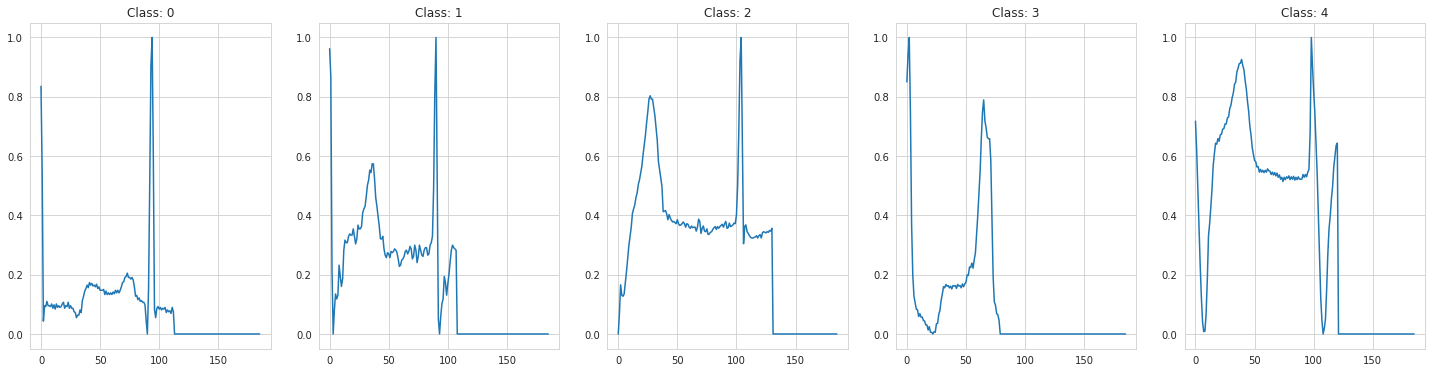

In [ ]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,6))

for i in range(5):
  ax[i].plot(train[train[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))
  # Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [ ]:
def gauss(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

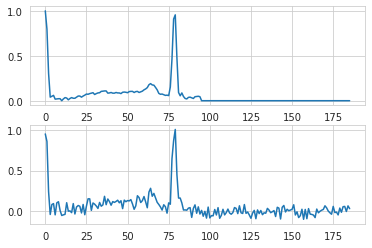

In [ ]:
temp=sam.iloc[0,:186]
fig=gauss(temp)

plt.subplot(2,1,1)
plt.plot(sam.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(fig)

plt.show()

In [ ]:
from keras.utils.np_utils import to_categorical
target_tr=train[187]
target_te=test[187]
y_train=to_categorical(target_tr)
y_test=to_categorical(target_te)

In [ ]:
# X_train=train.iloc[:,:186].values
# X_test=test.iloc[:,:186].values
# X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
# X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Conv1D(128, (50), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=Conv1D(pool_size=(2), strides=(1), padding="same")(conv1_1)
    conv2_1=Conv1D(32, (7), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(1), padding="same")(conv2_1)
    model.add(Convolution1D(100, 10, activation='relu'))
    model.add(Convolution1D(160, 10, activation='relu'))
    model.add(Flatten())
    model.add(Dense(units = 512, activation='relu'))
    model.add(Dense(units = 1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    
    flatten=Flatten()(conv7_1)
    dense_end1 = Dense(512, activation='relu')(flatten)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end1)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             Checkpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 103s 28ms/step - loss: 0.3350 - accuracy: 0.8788 - val_loss: 0.3394 - val_accuracy: 0.8676
Epoch 2/40
3125/3125 [==============================] - 91s 29ms/step - loss: 0.1484 - accuracy: 0.9488 - val_loss: 0.3033 - val_accuracy: 0.9032
Epoch 3/40
3125/3125 [==============================] - 88s 28ms/step - loss: 0.1022 - accuracy: 0.9656 - val_loss: 0.2057 - val_accuracy: 0.9341
Epoch 4/40
3125/3125 [==============================] - 87s 28ms/step - loss: 0.0791 - accuracy: 0.9737 - val_loss: 0.2412 - val_accuracy: 0.9231
Epoch 5/40
3125/3125 [==============================] - 88s 28ms/step - loss: 0.0652 - accuracy: 0.9793 - val_loss: 0.1743 - val_accuracy: 0.9518
Epoch 6/40
3125/3125 [==============================] - 91s 29ms/step - loss: 0.0563 - accuracy: 0.9818 - val_loss: 0.2379 - val_accuracy: 0.9375
Epoch 7/40
3125/3125 [==============================] - 87s 28ms/step - loss: 0.0518 - accuracy: 0.9838 - val_loss: 0.1834 

Accuracy: 95.18%


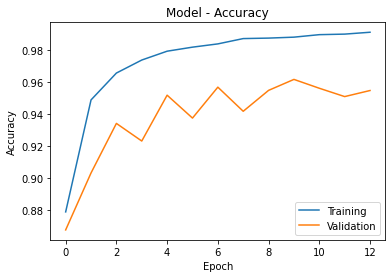

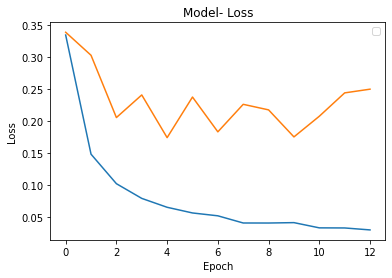

In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


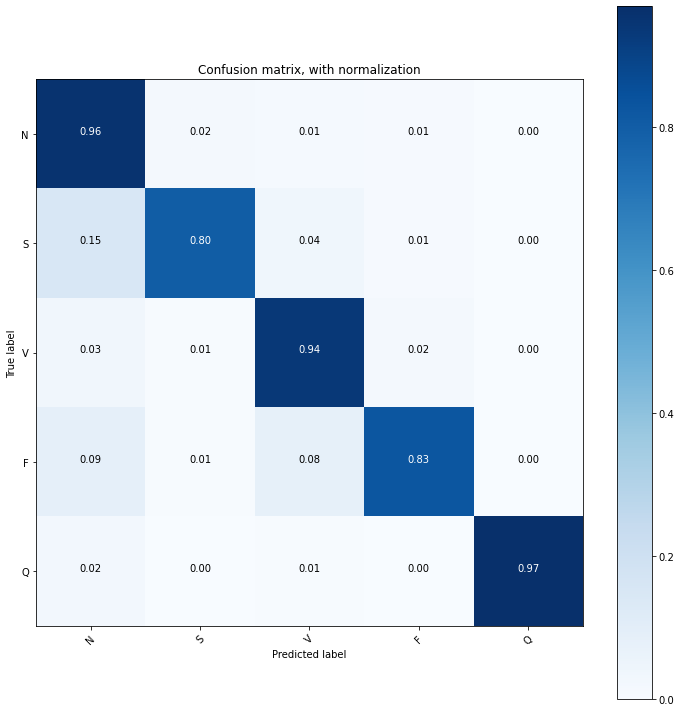

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [ ]:
data_train=pd.read_csv('/content/drive/MyDrive/data/mitbih_train.csv',header=None)
data_test=pd.read_csv('/content/drive/MyDrive/data/mitbih_test.csv',header=None)

In [ ]:
def lstm_model():
    model = Sequential()
    model.add(LSTM(64))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation='softmax'))
    C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
    A11 = Activation("relu")(C11)
    C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
    S11 = Add()([C12, C])
    A32 = Activation("relu")(S11)
    M11 = MaxPooling1D(pool_size=5, strides=2)(A12)
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [ ]:
model = lstm_model()

In [ ]:
logger = CSVLogger('logs.csv', append=True)
history_lstm = model.fit(X_train, y_train, epochs=50, batch_size=32, 
          validation_data=(X_test, y_test), callbacks=[logger])

Epoch 1/50
3125/3125 [==============================] - 169s 51ms/step - loss: 1.0768 - accuracy: 0.5724 - val_loss: 1.1441 - val_accuracy: 0.5421
Epoch 2/50
3125/3125 [==============================] - 154s 49ms/step - loss: 0.7825 - accuracy: 0.7143 - val_loss: 0.8576 - val_accuracy: 0.7119
Epoch 3/50
3125/3125 [==============================] - 154s 49ms/step - loss: 0.6480 - accuracy: 0.7697 - val_loss: 0.6418 - val_accuracy: 0.7901
Epoch 4/50
3125/3125 [==============================] - 154s 49ms/step - loss: 0.6029 - accuracy: 0.7877 - val_loss: 0.8292 - val_accuracy: 0.7222
Epoch 5/50
3125/3125 [==============================] - 156s 50ms/step - loss: 0.5344 - accuracy: 0.8143 - val_loss: 0.8667 - val_accuracy: 0.6994
Epoch 6/50
3125/3125 [==============================] - 156s 50ms/step - loss: 0.4924 - accuracy: 0.8288 - val_loss: 0.5815 - val_accuracy: 0.8093
Epoch 7/50
3125/3125 [==============================] - 156s 50ms/step - loss: 0.4535 - accuracy: 0.8407 - val_loss: 0

In [ ]:
history = history_lstm.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

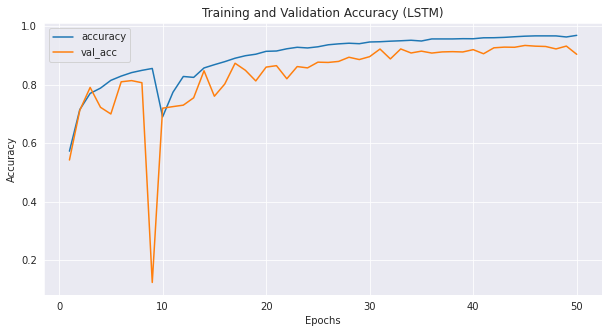

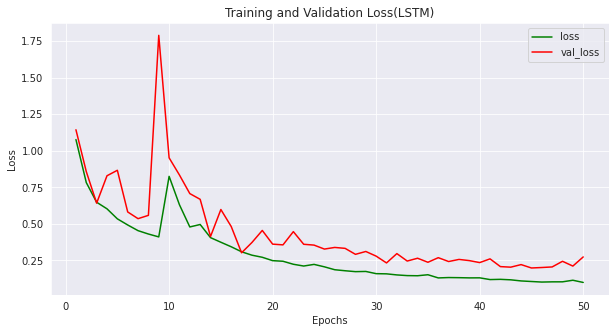

In [ ]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# accuracy/epoch plot
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# loss/epoch plot
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [ ]:
# make predictions and confusion matrix
y_pred_lstm = model.predict(X_test)
y_hat_lstm = np.argmax(y_pred_lstm, axis = 1)
confusion_matrix(np.argmax(y_test, axis = 1), y_hat_lstm)

array([[16217,  1208,   338,   269,    86],
       [   44,   492,    13,     4,     3],
       [   25,    24,  1363,    25,    11],
       [    2,     2,    18,   139,     1],
       [   18,    10,    15,     1,  1564]])

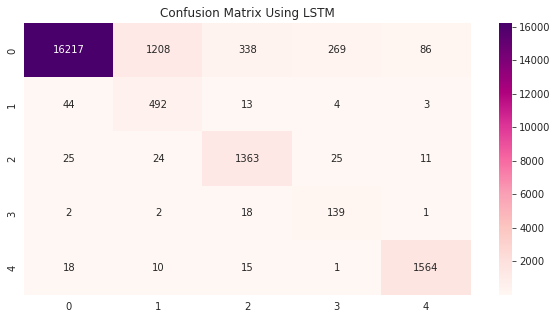

In [ ]:
# plot confusion matrix
plt.figure(figsize=(10, 5))
plt.title('Confusion Matrix Using LSTM')
sns.heatmap(confusion_matrix(np.argmax(y_test, axis = 1), y_hat_lstm), 
            annot=True, 
            fmt='0.0f', 
            cmap='RdPu')

In [ ]:
Gated Recurral 

In [ ]:
def gru_model():
    model = Sequential()
    model.add(GRU(64))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model




In [ ]:
# apply function
model = gru_model()

In [ ]:
# setup logger object
logger = CSVLogger('logs.csv', append=True)

# fit lstm on training data and validate on validation data
history_gru = model.fit(X_train, y_train, epochs=50, batch_size=32, 
          validation_data=(X_test, y_test), callbacks=[logger])

Epoch 1/50
3125/3125 [==============================] - 153s 46ms/step - loss: 1.2563 - accuracy: 0.4707 - val_loss: 1.4335 - val_accuracy: 0.2707
Epoch 2/50
3125/3125 [==============================] - 142s 45ms/step - loss: 1.0109 - accuracy: 0.6133 - val_loss: 1.0999 - val_accuracy: 0.5201
Epoch 3/50
3125/3125 [==============================] - 141s 45ms/step - loss: 0.6948 - accuracy: 0.7445 - val_loss: 0.6395 - val_accuracy: 0.8032
Epoch 4/50
3125/3125 [==============================] - 142s 45ms/step - loss: 0.5159 - accuracy: 0.8238 - val_loss: 0.6122 - val_accuracy: 0.8092
Epoch 5/50
3125/3125 [==============================] - 141s 45ms/step - loss: 0.4386 - accuracy: 0.8509 - val_loss: 0.5684 - val_accuracy: 0.8212
Epoch 6/50
3125/3125 [==============================] - 142s 46ms/step - loss: 0.3855 - accuracy: 0.8678 - val_loss: 0.5237 - val_accuracy: 0.8171
Epoch 7/50
3125/3125 [==============================] - 143s 46ms/step - loss: 0.3384 - accuracy: 0.8816 - val_loss: 0

In [ ]:
history = history_gru.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

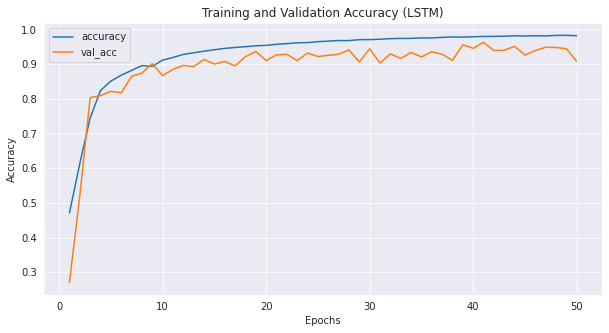

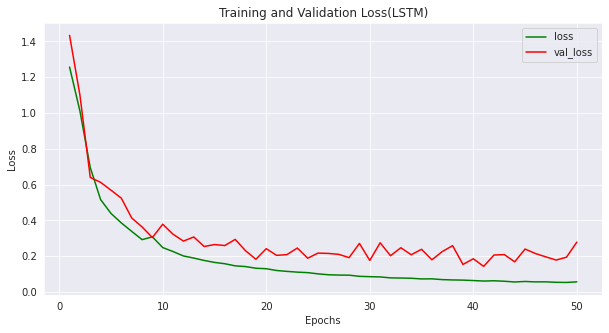

In [ ]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# accuracy/epoch plot
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# loss/epoch plot
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [ ]:
# make predictions and confusion matrix
y_pred_gru = model.predict(X_test)
y_hat_gru = np.argmax(y_pred_gru, axis = 1)
confusion_matrix(np.argmax(y_test, axis = 1), y_hat_gru)

array([[16318,   908,   307,   443,   142],
       [   52,   474,    18,     6,     6],
       [   20,    13,  1353,    55,     7],
       [    1,     1,     6,   154,     0],
       [    7,     5,    20,     3,  1573]])

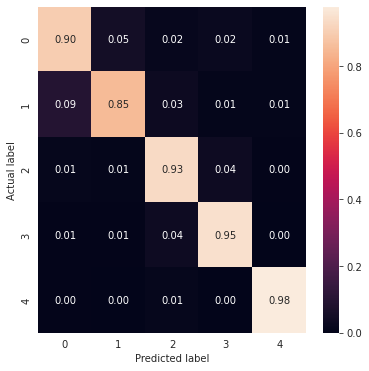

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=np.argmax(y_test,axis=1),y_pred=y_hat_gru,normalize="true")
sns.heatmap(cm, annot=True, ax = ax, fmt = '.2f')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()